In [1]:
from src.model import SiamNet, Encoder
from src.transform import get_transforms
from efficientnet_pytorch import EfficientNet
from PIL import Image
import numpy as np
import torch



/home/jovyan/.mlspace/envs/genimages/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


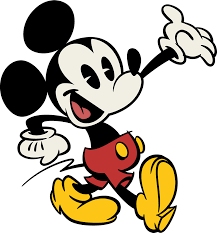

In [8]:
image = Image.open('image.png').convert('RGB')
image

In [9]:
basic_transform, simple_transform, train_transform = get_transforms()

In [10]:
basic_transform(image).shape

torch.Size([3, 224, 224])

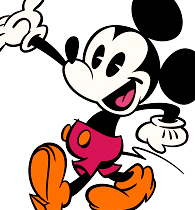

In [11]:
train_transform(image)

### model

In [38]:
net = Encoder()

Loaded pretrained weights for efficientnet-b3


In [39]:
tensor = basic_transform(image).unsqueeze(0)
tensor.shape

torch.Size([1, 3, 224, 224])

In [40]:
net(tensor).shape

torch.Size([1, 1536, 7, 7])

In [33]:
extractor = EfficientNet.from_pretrained('efficientnet-b3')
del extractor._fc

Loaded pretrained weights for efficientnet-b3


In [37]:
extractor(tensor)

AttributeError: 'EfficientNet' object has no attribute '_fc'

In [ ]:
import os

def count_images_in_directory(directory):
    # Список распространенных расширений файлов изображений
    image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff", ".webp"]

    # Подсчет количества файлов с расширениями изображений
    image_count = 0
    for filename in os.listdir(directory):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_count += 1

    return image_count

# Пример использования
directory_path = "путь/к/вашей/директории"
num_images = count_images_in_directory(directory_path)
print(f"Количество изображений в директории: {num_images}")
